# Quais passageiros sobreviveriam ao acidente do Titanic? 

# 1. Introdução
O objetivo deste estudo é prever, baseado na idade, sexo e outros atributos, se uma pessoa sobreviveria ao acidente ou não. Este projeto é baseado na competição do Kaggle, disponível em: https://www.kaggle.com/c/titanic/.

# 2. Dados

A base de dados utilizada consiste em uma base de treino (train.csv), que possui os atributos dos passageiros e a informação se ele sobreviveu ou não ao desastre, composta de 891 linhas. Esta base será utilizada treinar e validar o modelo de Machine Learning que pretendemos desenvolver.

Aleḿ da base de treino, também utilizaremos a base de teste (test.csv) onde são disponibilizados atributos de passageiros, mas não é informado se eles sobreviveram ao não ao desastre. Nosso objetivo é utilizar o modelo desenvolvido para prever resultados para a base de testes, para posteriormente enviá-los para a avaliação da plataforma Kaggle, que deverá avaliar a precisão do modelo desenvolvido com base nos resultados.

Os atributos dos passageiros e suas variáveis são listados a seguir:

*   PassengerId: id de 1 a 891
*   Survived: 0 = Sobreviveu , 1 = Não sobreviveu
*   Pclass (classe): Alta, Média, Baixa
*   Name: nome
*   Sex: feminino, masculino
*   Age (idade): É fracional se menor do que 1. Se estimada, é xx.5
*   SibSp (quantidade de parentes a bordo com parentesco de irmão, marido, esposa): 0 a 8
*   Parch (quantidade de parentes a bordo com parentesco de mãe, pai, filho, filha): 0 a 6
*   Ticket: número do ticket
*   Fare: tarifa do passageiro 
*   Cabin: número da cabine
*   Embarked: C = Cherbourg, Q = Queenstown, S = Southampton


# 3. WorKflow

Para desenvolver o modelo, adotaremos o seguinte Worflow:

> 
1. Importação de dados de treino
2. Análise da base de dados (verificação de valores faltantes e métodos possíveis para tratar estes dados)
3. Definição do modelo de Machine Learning divisão da base de treino e validação
4. Avaliação dos modelos
5. Ajustes de hiperparâmetros
6. Comparação dos modelos e conclusão

In [128]:
# Importando as primeiras ferramentas...
import pandas as pd
import numpy as np

In [129]:
# Importando os dados de treino...
df = pd.read_csv('https://raw.githubusercontent.com/ms-r0bot/Data-Science-Machine-Learning/main/titanic-competition/train.csv')

In [130]:
# Obtendo informações gerais sobre os dados...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [131]:
# Verificando se existem colunas com dados faltando...
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [132]:
# Vamos começar a tratar os dados. 
# Primeiramente, a idade: existem 177 valores faltando, então vamos preencher estes valores com a média das idades dos demais passageiros

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df['Age'] = df['Age'].fillna(content.median())
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [134]:
# O próximo passo para o tratamento é transformar os dados do tipo string (object) em tipo categoria.

for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 134.4 KB


In [135]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
# Em campos categóricos vazios, o código que traz a informação de campo vazio é -1. Por isso, ao somar +1, os campos vazios passam a ter código = 0 e os campos que já possuiam algum valor ficam com código = [código + 1].

for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull:
            df[label] = pd.Categorical(content).codes+1
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int16  
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int16(3), int64(5), int8(2)
memory usage: 55.8 KB


(None,
 PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin          0
 Embarked       0
 dtype: int64)

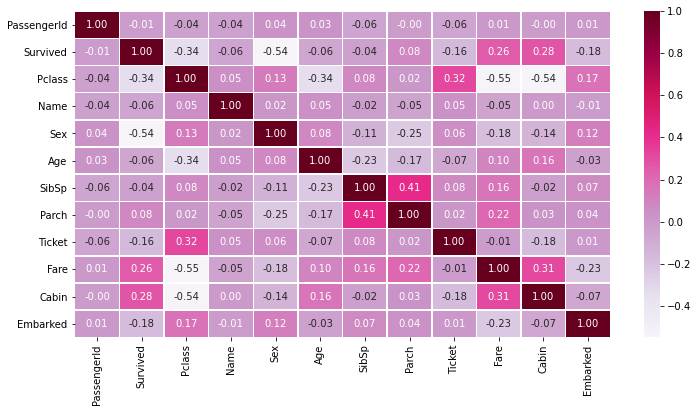

In [137]:
# Ao plotar uma a matriz de correlação para entender como os dados influenciam se um passageiro sobrevive ou não.
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='PuRd');


In [138]:
# Com os dados preparados, podemos pensar nos estimadores que podem ser utilizados para construir o modelo de ML.
# Este problema pode ser tratado como uma regressão binomial, onde deseja-se obter o a previsão com 2 possíveis resultados: sobrevivente ou não-sobrevivente.

In [139]:
# Separando a base de dados em validação e treino:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x = df.drop('Survived', axis=1)
y = df['Survived']
x_train , x_val , y_train, y_val = train_test_split(x,y, test_size=0.2)

In [140]:
# Vamos importar os classificadores que vamos utilizar e em seguida, criar um dicionário para encapsular os estimadores

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
modelos = {'Gaussian Naive Bayes': GaussianNB() ,
           'Logistic Regression': LogisticRegression(max_iter=2500),
           'Random Forest Classifier': RandomForestClassifier()}

# Vamos criar uma função para treinar, testar e avaliar os modelos

def treino_teste_avaliacao (modelos, x_train,y_train, x_val, y_val):
    np.random.seed(42)
    modelos_scores={}
    for nome, modelo in modelos.items():
        modelo.fit(x_train,y_train)
        modelos_scores[nome] = modelo.score(x_val,y_val)
    return modelos_scores
treino_teste_avaliacao (modelos, x_train,y_train, x_val, y_val)

{'Gaussian Naive Bayes': 0.7877094972067039,
 'Logistic Regression': 0.8100558659217877,
 'Random Forest Classifier': 0.8324022346368715}

In [141]:
# Vamos tentar melhorar os resultados através de ajustes de hiperparâmetros utilizando o RandomizedSearchCV
# Para isso, é necessário criar um dicionário contendo os hiperparâmetros dos 2 estimadores escolhidos 
# *Gaussian Naive Bayes foi descartado pois não pode ser melhorado através de otimização hiperparâmetros
np.random.seed(42)
logistic_rscv_hype = {'C': np.logspace(-4,4,20),
            'solver': ['liblinear']}

rand_rscv_hype = {'n_estimators': np.arange(100,1000,100),
             'max_depth':[None, 3, 5] ,
             'min_samples_split': np.arange(2,20,1),
             'min_samples_leaf': np.arange(1,20,1)}

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,cross_val_score, RandomizedSearchCV
# Com os dicionários de hiperparâmetros criados, é hora de utilizar o RandomizedSearchCV com o LogisticRegression 
logistic_rscv = RandomizedSearchCV(LogisticRegression(), param_distributions = logistic_rscv_hype, cv=5, n_iter=10, verbose=True)
logistic_rscv.fit(x_train,y_train)


# Fazer o mesmo para o Random Forest Classifier
rand_rscv = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rand_rscv_hype, cv=5, n_iter=10, verbose=True)
rand_rscv.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   43.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   verbose=True)

In [142]:
logistic_rscv.score(x_val, y_val),rand_rscv.score(x_val, y_val),rand_rscv.best_params_

(0.8100558659217877,
 0.8212290502793296,
 {'n_estimators': 200,
  'min_samples_split': 16,
  'min_samples_leaf': 5,
  'max_depth': None})

In [143]:
# Com o objetivo de melhorar os resultados, vamos tentar o GridSearchCV:
logistic_gscv_hype = {'C': np.logspace(-4,4,20),
                      'solver': ['liblinear']}

rand_gscv_hype = {'n_estimators': np.arange(600,1000,100),
             'max_depth':[None] ,
             'min_samples_split': [2],
             'min_samples_leaf': [1]}
np.random.seed(42)
#Com os dicionários de hiperparâmetros criados, é hora de utilizar o GridSearchCV com o LogisticRegression
logistic_gscv = GridSearchCV(LogisticRegression(), param_grid = logistic_gscv_hype, cv=5, verbose=True)
logistic_gscv.fit(x_train,y_train)


# Fazer o mesmo para o Random Forest Classifier
rand_gscv = GridSearchCV(RandomForestClassifier(), param_grid = rand_gscv_hype , cv=5, verbose=True)
rand_gscv.fit(x_train,y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   34.0s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'n_estimators': array([600, 700, 800, 900])},
             verbose=True)

In [156]:
# Vamos criar uma variável para receber o n_estimators e usá-lo como parâmetro a seguir
n_est = rand_gscv.best_params_['n_estimators']


In [157]:
# Com o gridsearch, foi um obtido um resultado melhor para o random forest. Agora é necessário gerar os preditct values e fazer o upload pra verificar a pontuação
x_test = pd.read_csv('https://raw.githubusercontent.com/alessandraearaujo/Data-Science-Machine-Learning/main/titanic-competition/test.csv')

# Para a base de testes, será necessário fazer os mesmos tratamentos de base feitos anteriormente
x_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [158]:
# Inputar a média de idade e fare nos Nan
for label, content in x_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            x_test['Age'] = x_test['Age'].fillna(content.median())
            x_test['Fare'] = x_test['Fare'].fillna(content.median())
x_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [159]:
# Em campos categóricos vazios, o código que traz a informação de campo vazio é -1. Por isso, ao somar +1, os campos vazios passam a ter código = 0 e os campos que já possuiam algum valor ficam com código = [código + 1].
  
for label, content in x_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull:
            x_test[label] = pd.Categorical(content).codes+1
x_test.info(), x_test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int16  
 3   Sex          418 non-null    int8   
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int16  
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int8   
 10  Embarked     418 non-null    int8   
dtypes: float64(2), int16(2), int64(4), int8(3)
memory usage: 22.6 KB


(None,
 PassengerId    0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin          0
 Embarked       0
 dtype: int64)

In [160]:
np.random.seed(42)
melhor_modelo = RandomForestClassifier(n_estimators=n_est)
melhor_modelo.fit(x_train,y_train)
melhor_modelo.score(x_val,y_val)
y_preds = melhor_modelo.predict(x_test)


In [161]:
kaggle = pd.DataFrame()
kaggle['PassengerId'] = x_test['PassengerId']
kaggle['Survived'] = y_preds
kaggle.to_csv('kaggle.csv', index=False)
rand_gscv.score(x_val,y_val)

0.8435754189944135

In [162]:
# A pontuação para o modelo: 0.8435754189944135
rand_gscv.score(x_val,y_val)

0.8435754189944135

In [ ]:
# No futuro, é necessário pensar em formas de fazer alguma engenharia nos dado para obter resultados melhores!